# Twitter Project-Cowin

# Importing libraries

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import squarify 
import matplotlib as mt


# Loading the data

In [2]:
df=pd.read_csv('tweets.csv')
hashtag=pd.read_csv('hashtag.csv')

# Frequency plot for most comonly used hashtags

In [3]:
#Frequency of top hashtags
px.bar(x = hashtag['hashtag'][0:20], y = hashtag['frequency'][0:20], color= hashtag['hashtag'][0:20],
       color_discrete_sequence=["lightcoral", "deeppink", "orange", "red", "red","red", "indianred",
                                "deeppink", "orange", "deeppink","lightcoral", "green", "lightcoral", 
                                "green", "deeppink","green", "red", "red", "deeppink", "deeppink"])

Conclusion:

    - The reason for making a cowin app is shown above from this we can observe that the app
    was mainly built for booking vaccination slots.
   

(0.0, 100.0, 0.0, 100.0)

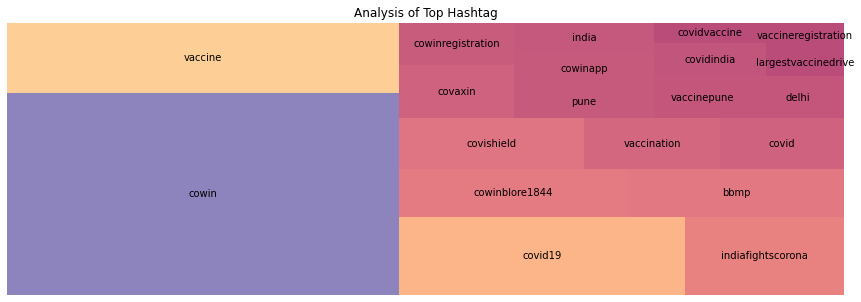

In [4]:
#Tree map
cmap = mt.cm.Spectral
mini=min(hashtag['frequency'][0:20])
maxi=max(hashtag['frequency'][0:20])
norm = mt.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in hashtag['frequency'][0:20]]
plt.figure(figsize=(15,5))
squarify.plot(sizes=hashtag['frequency'][0:20],label=hashtag['hashtag'][0:40], alpha=.7,color=colors)

plt.title('Analysis of Top Hashtag')

plt.axis('off')


CONCLUSION:

    - From the above tree map we can observe that people are much more interseted to 
    go with covidshield compared with covaxin.
    

# Sentimental Analysis 

In [5]:
import re
df['Text'] =df['Text'].str.replace('\d+','')
df['Text'] =df['Text'].str.replace('.','')
def remove_pattern(input_txt):
    r = re.sub("[^a-zA-Z]"," ",str(input_txt))
    r = re.findall(r"@(w+)", str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)      
    return input_txt
df['@_remove'] = np.vectorize(remove_pattern)(df['Text'])

def cleanTxt(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text=re.sub(r'#','',str(text))
    text = re.sub('http[^\s]+','',str(text))
    text=re.sub(r'@[A-Za-z0-9]+','',str(text))
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))
    
    
df['Text']=df['Text'].apply(cleanTxt)

def sentiment_scores(sentence):
    s=TextBlob(sentence)
    sentiment_dict = s.sentiment.polarity
    if sentiment_dict>0 and sentiment_dict<=1:
        return "positive"
    elif sentiment_dict<0 :
        return "negative"
    elif sentiment_dict==0 :
        return "neutral"

l=[sentiment_scores(i) for i in df.Text]
df["labels"] = l



In [6]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df['month']=df['Datetime'].dt.to_period('M').astype(str)

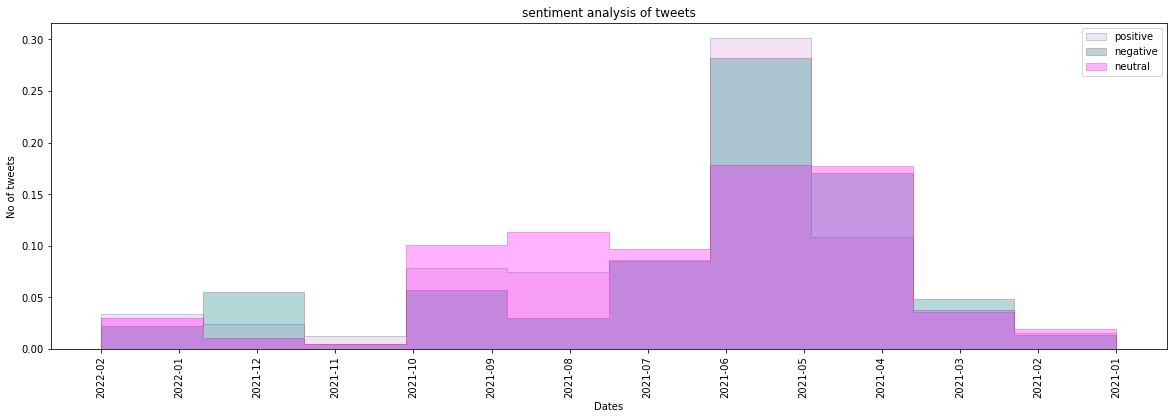

In [7]:
plt.figure(figsize=(20,6))
cl_df = df["month"][df["labels"] == "positive"]
sa_df = df["month"][df["labels"] == "negative"]
tr_df = df["month"][df["labels"] == "neutral"]
plt.hist(cl_df,color='plum',alpha=0.3,label='positive',histtype='stepfilled',density=True,edgecolor='darkcyan')
plt.hist(sa_df,color='teal',alpha=0.3,label='negative',histtype='stepfilled',density=True,edgecolor='crimson')
plt.hist(tr_df,alpha=0.3,color='magenta',label='neutral',histtype='stepfilled',density=True,edgecolor='mediumvioletred')
plt.legend()
plt.xticks(rotation=90)
plt.title("sentiment analysis of tweets")
plt.xlabel("Dates")
plt.ylabel("No of tweets")
plt.show()

Conclusion:

    -Here we can observe the sentimental analysis of tweets between the time period 2021-06 to 2021-05 has been the most postive and negative tweeted month for cowin app. 
    
    -We can analyse the reason for positive and negative feeling in the later part.

# DONUT CHART FOR SENTIMENT ANALYSIS

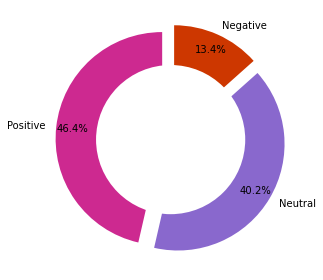

In [8]:
#donut
colors = ['#CD2990','#8968CD','#CD3700']
explode = (0.08,0.08,0.08)
 
plt.pie(df.labels.value_counts(),colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,labels=['Positive','Neutral','Negative'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

Conclusion:

    -By doing sentiment analysis, we can observe that there is a positive feeling among people on average.
    
    -However there are some negative reviews that should be considered for more effective working of the app.

# WORDCLOUD FOR JANUARY TO JUNE MONTHS

In [9]:
from wordcloud import WordCloud,STOPWORDS

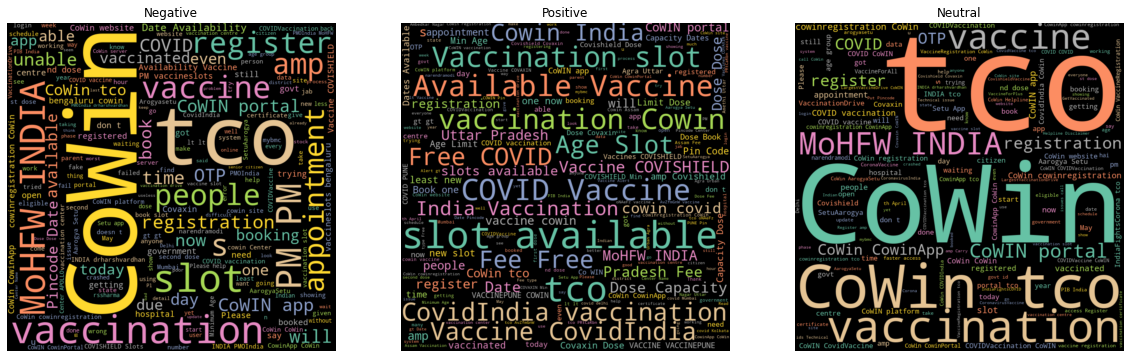

In [10]:

df['month'] = pd.to_datetime(df['month'])
mask = (df['month'] > '2021-01-01') & (df['month'] <= '2021-06-30') 
g=df.loc[mask].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='negative']
p=g[g['labels']=='positive']
ne=g[g['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = ' '.join([word for word in comment_words.split() if word not in (stopwords.words('english'))])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download('words')
words=set(nltk.corpus.words.words())
text= " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [13]:
words=text.split()
len(words)

59800

In [14]:
word=[]
for i in range(59800):
    word.append(words[i])

In [15]:
for i in range(len(word)):
    word[i] = word[i].lower()

In [16]:
word=np.array(word)
(unique,count)=np.unique(word,return_counts=True)
data_word=pd.DataFrame({'words':unique,'frequency':count})
df2=data_word.sort_values('frequency',ascending=False)

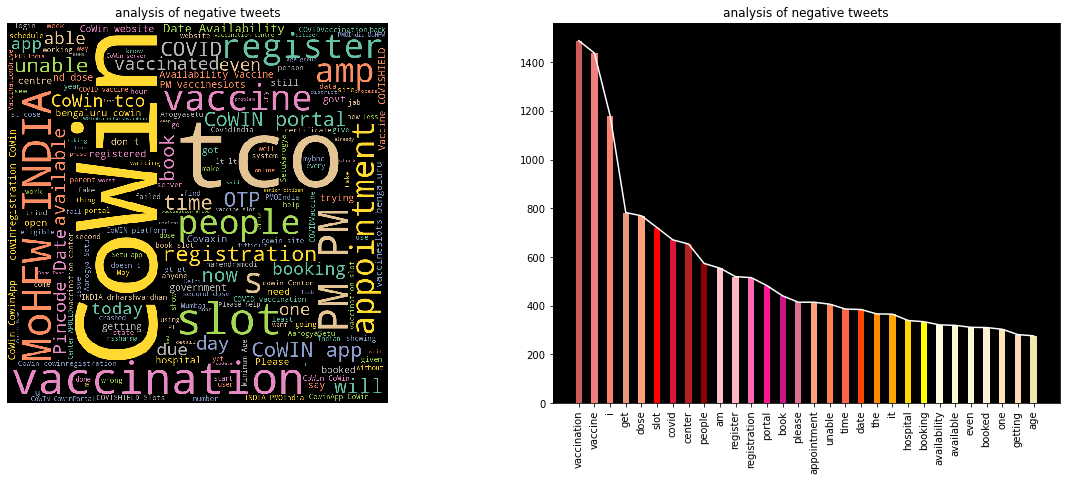

In [17]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))

ax1.imshow(wordcloud,interpolation="none")
ax1.set_title('analysis of negative tweets')

ax1.axis('off')


ax2.bar(df2['words'][0:30], df2['frequency'][0:30],color=['indianred','lightcoral','salmon','darksalmon','lightsalmon','red','crimson','firebrick','darkred','pink','lightpink','hotpink','deeppink','mediumvioletred','palevioletred','lightsalmon','coral','tomato','orangered','darkorange','orange','gold','yellow','lightyellow','lemonchiffon','lightgoldenrodyellow','papayawhip','moccasin','peachpuff','palegoldenrod'],width = 0.4)
ax2.set_title('analysis of negative tweets')
ax2.plot(df2['words'][0:30], df2['frequency'][0:30],color='white')
ax2.set_xticklabels(df2['words'][0:30],rotation='vertical',size=10)
ax2.set_facecolor("black")
plt.show()

# WORDCLOUD FOR JUNE TO DECEMBER MONTHS

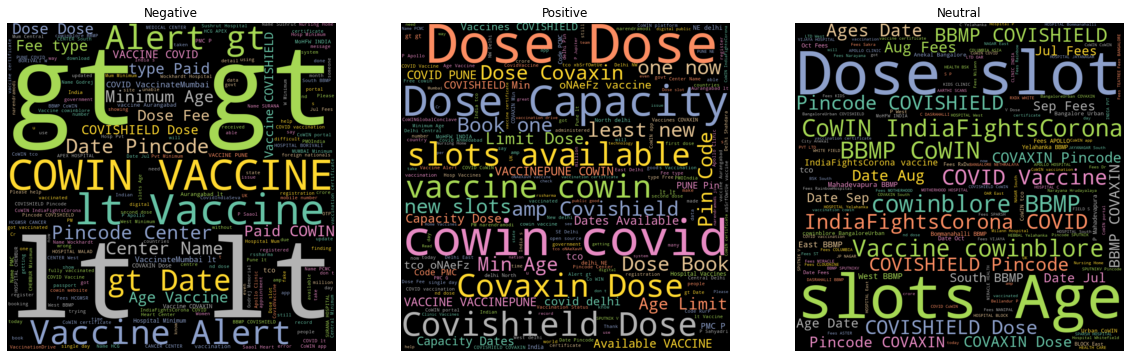

In [19]:

mask = (df['month'] > '2021-06-01') & (df['month'] <= '2021-12-31') 
g=df.loc[mask].reset_index(drop=False)

comment_words = ''
comment_words1 = ''
comment_words2 = ''
stopwords = set(STOPWORDS)
n=g[g['labels']=='negative']
p=g[g['labels']=='positive']
ne=g[g['labels']=='neutral']

for val in n['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words)

for val in p['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words1)

for val in ne['Text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        if tokens[i] == 'JJ' or tokens[i]=='JJR' or tokens[i]=='JJS':
            tokens[i] = tokens[i].lower()
    comment_words2 += " ".join(tokens)+" "
 
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                colormap='Set2',
                min_font_size =10).generate(comment_words2)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,7)) 
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive')
  
ax3.imshow(wordcloud2, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Neutral')
     
plt.show()

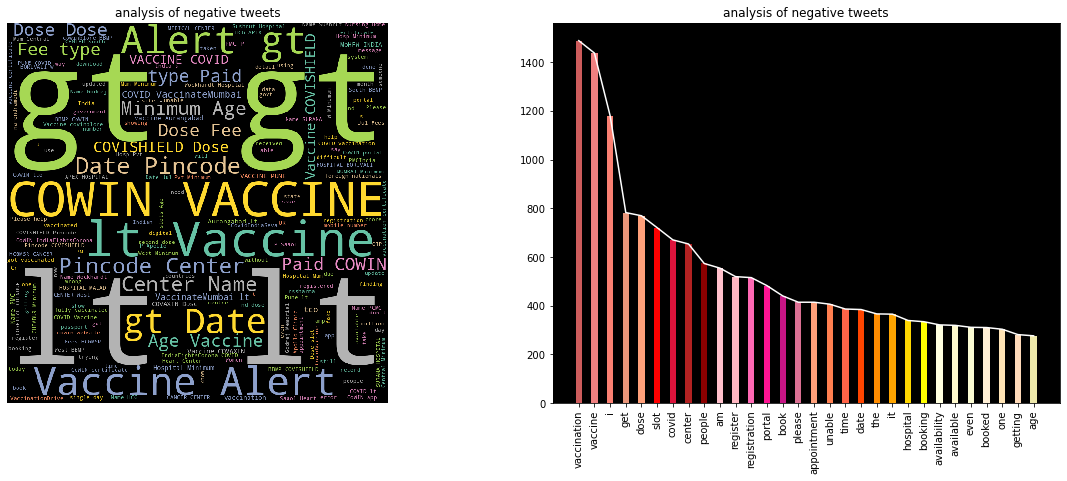

In [20]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))

ax1.imshow(wordcloud,interpolation="none")
ax1.set_title('analysis of negative tweets')

ax1.axis('off')


ax2.bar(df2['words'][0:30], df2['frequency'][0:30],color=['indianred','lightcoral','salmon','darksalmon','lightsalmon','red','crimson','firebrick','darkred','pink','lightpink','hotpink','deeppink','mediumvioletred','palevioletred','lightsalmon','coral','tomato','orangered','darkorange','orange','gold','yellow','lightyellow','lemonchiffon','lightgoldenrodyellow','papayawhip','moccasin','peachpuff','palegoldenrod'],width = 0.4)
ax2.set_title('analysis of negative tweets')
ax2.plot(df2['words'][0:30], df2['frequency'][0:30],color='white')
ax2.set_xticklabels(df2['words'][0:30],rotation='vertical',size=10)
ax2.set_facecolor("black")
plt.show()

 CONCLUSION:
 
        - In order to analyze the exact reason for negative reviews in different
    time period we have splitted the dataframe into 3 dataframe for time period of 6 months each.

# GROUPING APP RELATED HASHTAGS

In [32]:
list1 = ['booking','slot','slots','dose','register','available','appointment']

In [33]:
list1

['booking', 'slot', 'slots', 'dose', 'register', 'available', 'appointment']

In [34]:
alert_data = df[df['hashtags'].str.contains("slot")]
alert_data['APP'] = df['hashtags'].str.findall(r"\b"+"|".join(list1)+ r"\b").apply(", ".join)

In [35]:
alert_value = float("NaN")
alert_data.replace("",alert_value, inplace=True)


In [36]:
alert_data = alert_data.dropna().reset_index(drop=False)

In [37]:
alert_data

level_0  Unnamed: 0  index                  Datetime  \
0       4642        4642   4643 2021-10-31 13:26:23+00:00   
1       8143        8143   8144 2021-09-20 07:31:57+00:00   
2      10375       10375  10376 2021-09-04 04:32:16+00:00   
3      13104       13104  13105 2021-08-24 15:52:24+00:00   
4      13105       13105  13106 2021-08-24 15:50:27+00:00   
..       ...         ...    ...                       ...   
363    45883       45883  45889 2021-04-28 12:50:53+00:00   
364    45981       45981  45987 2021-04-28 12:34:37+00:00   
365    46669       46669  46675 2021-04-28 11:41:14+00:00   
366    47252       47252  47258 2021-04-28 11:25:50+00:00   
367    52899       52899  52906 2021-04-24 07:03:43+00:00   

                Tweet Id                                               Text  \
0    1454801930572599300   CoWIN  Digital  Backbone of  LargestVaccineDr...   
1    1439854829052956673   cowin  cowinslotfinder  Co Win Finder in Mald...   
2    1434011407893229568  Booking Vaccine Slot  Na Playing KBC Fast Fing...   
3    1430196298762711042   MyGovHindi  MoHFW INDIA  PMOIndia  PIBHindi  ...   
4    1430195809644019716   mygovindia  MoHFW INDIA  PMOIndia    tco LNpw...   
..                   ...                                                ...   
363  1387388852000546819  CoWin chief says slots for   towards booking o...   
364  1387384759404224522   cowin  registered but  noslots No vaccine cen...   
365  1387371322553012224   mygovindia  CoWin All the centres are throwin...   
366  1387367449184530434  Govt to everyone in age bracket of       CoWin...   
367  1385851932321796096                                                ...   

            Username                                           hashtags  \
0          SKodineya  ['CoWIN', 'Digital', 'Backbone', 'LargestVacci...   
1          sobaraage                       ['cowin', 'cowinslotfinder']   
2      mr_swarnakar_  ['COWIN', 'vaccineslot', 'vacination', 'GetVac...   
3          hrishit_J  ['cowin', 'COVID19', 'vaccine', 'slots', 'appo...   
4          hrishit_J  ['cowin', 'COVID19', 'vaccine', 'slots', 'appo...   
..               ...                                                ...   
363     praneethshub  ['cowinregistration', 'CowinDown', 'VaccineFor...   
364      Rajashakher                 ['cowin', 'registered', 'noslots']   
365  LakhaniKhushboo  ['CoWin', 'Registeredbutnoslotsforcowin', 'Vac...   
366        veddhaval                               ['CoWin', 'noslots']   
367       abeeshsuku                   ['help', 'vaccineslot', 'CoWin']   

                         location  \
0                  Baghpat, India   
1    Kaliachak, Malda West Bengal   
2                          Odisha   
3               Kushinagar, India   
4               Kushinagar, India   
..                            ...   
363                          Pune   
364              Hyderabad, India   
365              Bengaluru, India   
366                          Pune   
367                       കേരളം     

                                              @_remove    labels      month  \
0    #CoWIN\n#Digital #Backbone of #LargestVaccineD...  positive 2021-10-01   
1    #cowin #cowinslotfinder \nCo Win Finder in Mal...  positive 2021-09-01   
2    Booking Vaccine Slot,\nNa Playing KBC Fast Fin...  positive 2021-09-01   
3    @MyGovHindi @MoHFW_INDIA @PMOIndia @PIBHindi @...   neutral 2021-08-01   
4    @mygovindia @MoHFW_INDIA @PMOIndia https://tco...   neutral 2021-08-01   
..                                                 ...       ...        ...   
363  CoWin chief says slots for + towards booking o...  positive 2021-04-01   
364  #cowin #registered but #noslots No vaccine cen...  positive 2021-04-01   
365  @mygovindia #CoWin All the centres are throwin...  positive 2021-04-01   
366  Govt to everyone in age bracket of  - \n #CoWi...   neutral 2021-04-01   
367  കൊല്ലം ജില്ലയിൽ ഈ വരുന്ന ആഴ്ചയും അടുത്ത ആഴ്ച്ച...   neutral 2021-04-01   

                            

In [38]:
alert_data['Datetime']=pd.to_datetime(alert_data['Datetime'])
alert_data['day']=alert_data['Datetime'].dt.to_period('D').astype(str)

In [39]:
alert_data

level_0  Unnamed: 0  index                  Datetime  \
0       4642        4642   4643 2021-10-31 13:26:23+00:00   
1       8143        8143   8144 2021-09-20 07:31:57+00:00   
2      10375       10375  10376 2021-09-04 04:32:16+00:00   
3      13104       13104  13105 2021-08-24 15:52:24+00:00   
4      13105       13105  13106 2021-08-24 15:50:27+00:00   
..       ...         ...    ...                       ...   
363    45883       45883  45889 2021-04-28 12:50:53+00:00   
364    45981       45981  45987 2021-04-28 12:34:37+00:00   
365    46669       46669  46675 2021-04-28 11:41:14+00:00   
366    47252       47252  47258 2021-04-28 11:25:50+00:00   
367    52899       52899  52906 2021-04-24 07:03:43+00:00   

                Tweet Id                                               Text  \
0    1454801930572599300   CoWIN  Digital  Backbone of  LargestVaccineDr...   
1    1439854829052956673   cowin  cowinslotfinder  Co Win Finder in Mald...   
2    1434011407893229568  Booking Vaccine Slot  Na Playing KBC Fast Fing...   
3    1430196298762711042   MyGovHindi  MoHFW INDIA  PMOIndia  PIBHindi  ...   
4    1430195809644019716   mygovindia  MoHFW INDIA  PMOIndia    tco LNpw...   
..                   ...                                                ...   
363  1387388852000546819  CoWin chief says slots for   towards booking o...   
364  1387384759404224522   cowin  registered but  noslots No vaccine cen...   
365  1387371322553012224   mygovindia  CoWin All the centres are throwin...   
366  1387367449184530434  Govt to everyone in age bracket of       CoWin...   
367  1385851932321796096                                                ...   

            Username                                           hashtags  \
0          SKodineya  ['CoWIN', 'Digital', 'Backbone', 'LargestVacci...   
1          sobaraage                       ['cowin', 'cowinslotfinder']   
2      mr_swarnakar_  ['COWIN', 'vaccineslot', 'vacination', 'GetVac...   
3          hrishit_J  ['cowin', 'COVID19', 'vaccine', 'slots', 'appo...   
4          hrishit_J  ['cowin', 'COVID19', 'vaccine', 'slots', 'appo...   
..               ...                                                ...   
363     praneethshub  ['cowinregistration', 'CowinDown', 'VaccineFor...   
364      Rajashakher                 ['cowin', 'registered', 'noslots']   
365  LakhaniKhushboo  ['CoWin', 'Registeredbutnoslotsforcowin', 'Vac...   
366        veddhaval                               ['CoWin', 'noslots']   
367       abeeshsuku                   ['help', 'vaccineslot', 'CoWin']   

                         location  \
0                  Baghpat, India   
1    Kaliachak, Malda West Bengal   
2                          Odisha   
3               Kushinagar, India   
4               Kushinagar, India   
..                            ...   
363                          Pune   
364              Hyderabad, India   
365              Bengaluru, India   
366                          Pune   
367                       കേരളം     

                                              @_remove    labels      month  \
0    #CoWIN\n#Digital #Backbone of #LargestVaccineD...  positive 2021-10-01   
1    #cowin #cowinslotfinder \nCo Win Finder in Mal...  positive 2021-09-01   
2    Booking Vaccine Slot,\nNa Playing KBC Fast Fin...  positive 2021-09-01   
3    @MyGovHindi @MoHFW_INDIA @PMOIndia @PIBHindi @...   neutral 2021-08-01   
4    @mygovindia @MoHFW_INDIA @PMOIndia https://tco...   neutral 2021-08-01   
..                                                 ...       ...        ...   
363  CoWin chief says slots for + towards booking o...  positive 2021-04-01   
364  #cowin #registered but #noslots No vaccine cen...  positive 2021-04-01   
365  @mygovindia #CoWin All the centres are throwin...  positive 2021-04-01   
366  Govt to everyone in age bracket of  - \n #CoWi...   neutral 2021-04-01   
367  കൊല്ലം ജില്ലയിൽ ഈ വരുന്ന ആഴ്ചയും അടുത്ത ആഴ്ച്ച...   neutral 2021-04-01   

                            

No handles with labels found to put in legend.


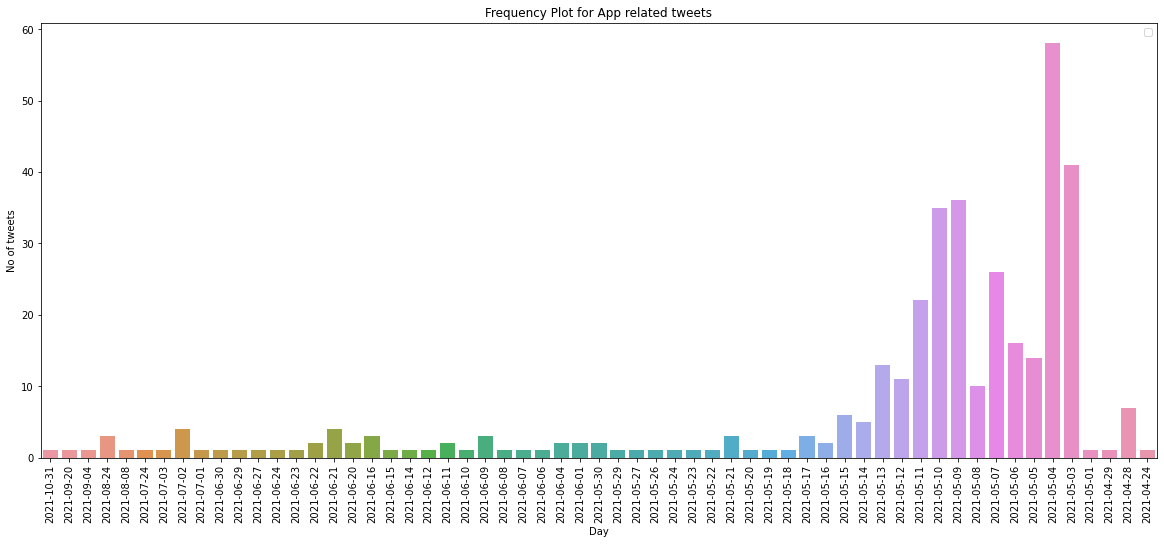

In [40]:
fig =plt.subplots(figsize=(20,8))
sns.countplot(x="day", data=alert_data)
plt.legend()
plt.title("Frequency Plot for App related tweets")
plt.xlabel("Day")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()

# GROUPING MINIMUM AGE RELATED HASHTAGS

In [58]:
list5=['minimum','age']

In [59]:
list5

['minimum', 'age']

In [60]:
alert4_data = df[df['hashtags'].str.contains("age")]
alert4_data['VACCINATED'] = df['hashtags'].str.findall(r"\b"+"|".join(list5)+ r"\b").apply(", ".join)

In [61]:
alert4_value = float("NaN")
alert4_data.replace("",alert4_value, inplace=True)


In [62]:
alert4_data = alert4_data.dropna().reset_index(drop=False)

In [63]:
alert4_data

level_0  Unnamed: 0  index                  Datetime  \
0         50          50     50 2022-02-07 13:22:31+00:00   
1       1024        1024   1024 2022-01-15 13:10:01+00:00   
2       6962        6962   6963 2021-09-27 10:49:25+00:00   
3       7669        7669   7670 2021-09-22 15:37:10+00:00   
4       8265        8265   8266 2021-09-19 04:49:37+00:00   
..       ...         ...    ...                       ...   
295    54004       54004  54011 2021-04-16 08:30:23+00:00   
296    54047       54047  54054 2021-04-15 04:47:56+00:00   
297    54141       54141  54148 2021-04-12 06:39:57+00:00   
298    54194       54194  54201 2021-04-10 11:02:39+00:00   
299    58464       58464  58471 2021-01-07 07:43:38+00:00   

                Tweet Id                                               Text  \
0    1490677355236540421  Correct    The way India handled pandemic is a...   
1    1482339289094828034  Union Health Ministry clarifies Covaxin shorta...   
2    1442441241141006340  This is happening every day   vaccineshortage ...   
3    1440701716681269261   UK is case study of inferiority complex  CoWI...   
4    1439451589249585159  All endings are also beginnings We just don t ...   
..                   ...                                                ...   
295  1382974641401057283   nath ngatey  PomiBaruah  dccachar  mygovassam...   
296  1382556272768163843  My parents are now reluctant for vaccination A...   
297  1381497297851183105  No vaccine available for my parents even thoug...   
298  1380838634811613184   vaccine schedule of second dose for my mother...   
299  1347086476211720192   HarshVardhan to meet state health ministers a...   

           Username                                           hashtags  \
0        FekuBuster  ['ThaaliBajao', 'TaaliBajao', 'JanataCurfew', ...   
1    medicaldialogs  ['cowin', 'maharashtra', 'covid', 'covid', 'co...   
2            GPT3ai                       ['vaccineshortage', 'cowin']   
3      Harshalsalve  ['UK', 'CoWIN', 'Cuttingage', 'Digitalinterven...   
4             9afan  ['quote', 'zealebration', 'Zeel', 'ZPTC', 'AEW...   
..              ...                                                ...   
295   BeingSauravCh                       ['cowin', 'VaccineShortage']   
296     preetphysio  ['failedvaccination', 'CoWIN', 'VaccineShortage']   
297     vividrohini   ['CoronavirusIndia', 'CoWIN', 'vaccineshortage']   
298     amitjain001  ['vaccine', 'CoWIN', 'Gurgaon', 'vaccineshorta...   
299     the_news_21  ['HarshVardhan', 'India', 'COVID19', 'COVID19v...   

                       location  \
0                        Mumbai   
1              New Delhi, Delhi   
2                         India   
3                     New Delhi   
4    Gilgit-Baltistan, Pakistan   
..                          ...   
295       Dibrugarh & Bengaluru   
296                खारघर, पनवेल   
297            Hyderabad, India   
298              Gurgaon, India   
299               Mumbai, India   

                                              @_remove    labels      month  \
0    Correct ✔\n\nThe way India handled pandemic is...   neutral 2022-02-01   
1    Union Health Ministry clarifies Covaxin shorta...   neutral 2022-01-01   
2    This is happening every day\n\n#vaccineshortag...   neutral 2021-09-01   
3    #UK is case study of inferiority complex #CoWI...  positive 2021-09-01   
4    All endings are also beginnings We just don't ...   neutral 2021-09-01   
..                                                 ...       ...        ...   
295  @nath_ngatey @PomiBaruah @dccachar @mygovassam...  positive 2021-04-01   
296  My parents are now reluctant for vaccination A...   neutral 2021-04-01   
297  No vaccine available for my parents even thoug...  positive 2021-04-01   
298  #vaccine schedule of second dose for my mother...   neutral 2021-04-01   
299  #HarshVardhan to meet state health ministers a...  negative 2021-01-01   

    VACCINATED  
0          age  
1          age  
2          ag

In [64]:
alert4_data['Datetime']=pd.to_datetime(alert4_data['Datetime'])
alert4_data['day']=alert4_data['Datetime'].dt.to_period('D').astype(str)

In [65]:
alert4_data

level_0  Unnamed: 0  index                  Datetime  \
0         50          50     50 2022-02-07 13:22:31+00:00   
1       1024        1024   1024 2022-01-15 13:10:01+00:00   
2       6962        6962   6963 2021-09-27 10:49:25+00:00   
3       7669        7669   7670 2021-09-22 15:37:10+00:00   
4       8265        8265   8266 2021-09-19 04:49:37+00:00   
..       ...         ...    ...                       ...   
295    54004       54004  54011 2021-04-16 08:30:23+00:00   
296    54047       54047  54054 2021-04-15 04:47:56+00:00   
297    54141       54141  54148 2021-04-12 06:39:57+00:00   
298    54194       54194  54201 2021-04-10 11:02:39+00:00   
299    58464       58464  58471 2021-01-07 07:43:38+00:00   

                Tweet Id                                               Text  \
0    1490677355236540421  Correct    The way India handled pandemic is a...   
1    1482339289094828034  Union Health Ministry clarifies Covaxin shorta...   
2    1442441241141006340  This is happening every day   vaccineshortage ...   
3    1440701716681269261   UK is case study of inferiority complex  CoWI...   
4    1439451589249585159  All endings are also beginnings We just don t ...   
..                   ...                                                ...   
295  1382974641401057283   nath ngatey  PomiBaruah  dccachar  mygovassam...   
296  1382556272768163843  My parents are now reluctant for vaccination A...   
297  1381497297851183105  No vaccine available for my parents even thoug...   
298  1380838634811613184   vaccine schedule of second dose for my mother...   
299  1347086476211720192   HarshVardhan to meet state health ministers a...   

           Username                                           hashtags  \
0        FekuBuster  ['ThaaliBajao', 'TaaliBajao', 'JanataCurfew', ...   
1    medicaldialogs  ['cowin', 'maharashtra', 'covid', 'covid', 'co...   
2            GPT3ai                       ['vaccineshortage', 'cowin']   
3      Harshalsalve  ['UK', 'CoWIN', 'Cuttingage', 'Digitalinterven...   
4             9afan  ['quote', 'zealebration', 'Zeel', 'ZPTC', 'AEW...   
..              ...                                                ...   
295   BeingSauravCh                       ['cowin', 'VaccineShortage']   
296     preetphysio  ['failedvaccination', 'CoWIN', 'VaccineShortage']   
297     vividrohini   ['CoronavirusIndia', 'CoWIN', 'vaccineshortage']   
298     amitjain001  ['vaccine', 'CoWIN', 'Gurgaon', 'vaccineshorta...   
299     the_news_21  ['HarshVardhan', 'India', 'COVID19', 'COVID19v...   

                       location  \
0                        Mumbai   
1              New Delhi, Delhi   
2                         India   
3                     New Delhi   
4    Gilgit-Baltistan, Pakistan   
..                          ...   
295       Dibrugarh & Bengaluru   
296                खारघर, पनवेल   
297            Hyderabad, India   
298              Gurgaon, India   
299               Mumbai, India   

                                              @_remove    labels      month  \
0    Correct ✔\n\nThe way India handled pandemic is...   neutral 2022-02-01   
1    Union Health Ministry clarifies Covaxin shorta...   neutral 2022-01-01   
2    This is happening every day\n\n#vaccineshortag...   neutral 2021-09-01   
3    #UK is case study of inferiority complex #CoWI...  positive 2021-09-01   
4    All endings are also beginnings We just don't ...   neutral 2021-09-01   
..                                                 ...       ...        ...   
295  @nath_ngatey @PomiBaruah @dccachar @mygovassam...  positive 2021-04-01   
296  My parents are now reluctant for vaccination A...   neutral 2021-04-01   
297  No vaccine available for my parents even thoug...  positive 2021-04-01   
298  #vaccine schedule of second dose for my mother...   neutral 2021-04-01   
299  #HarshVardhan to meet state health ministers a...  negative 2021-01-01   

    VACCINATED         day  
0          age  2022-02-07  
1     

No handles with labels found to put in legend.


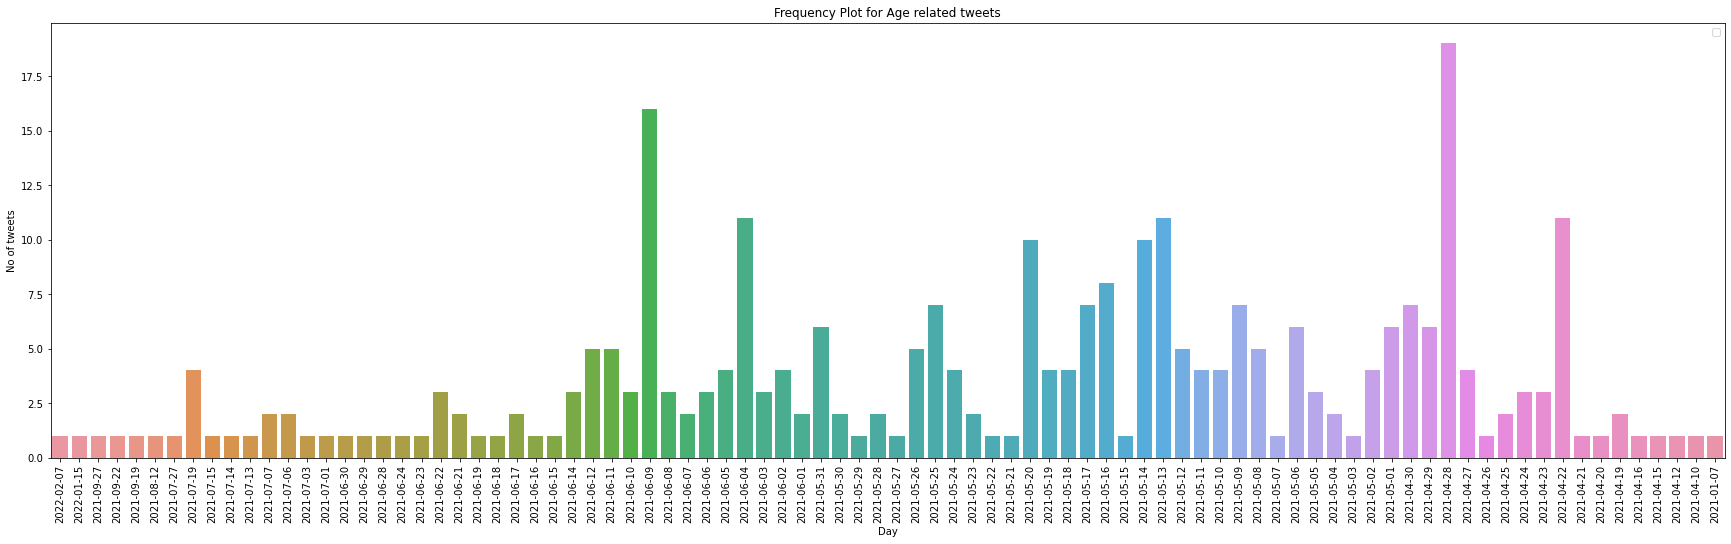

In [66]:
fig =plt.subplots(figsize=(30,8))
sns.countplot(x="day", data=alert4_data)
plt.legend()
plt.title("Frequency Plot for Age related tweets")
plt.xlabel("Day")
plt.ylabel("No of tweets")
plt.xticks(rotation=90)
plt.show()